1.5 0.0236977 0.8491125777355301 2.0066800815999484 0.2500146855647187
1.75 0.0251812 0.7906513126111725 0.7819535085452767 0.1678197757750555
2 0.025556 0.7202900843238464 0.47965709493930936 0.10186206306547131

****************************************
Minimizer is Linear / Migrad
Chi2                      =      5.77663
NDf                       =            1
#sigma^{fit}_{T}          =     -6.32184   +/-   1.37219     
#sigma^{fit}_{L}          =      9.37171   +/-   1.82357     


Info in <TCanvas::Print>: pdf file Rosenbluth_test.HallA.data.tpbin1.pdf has been created


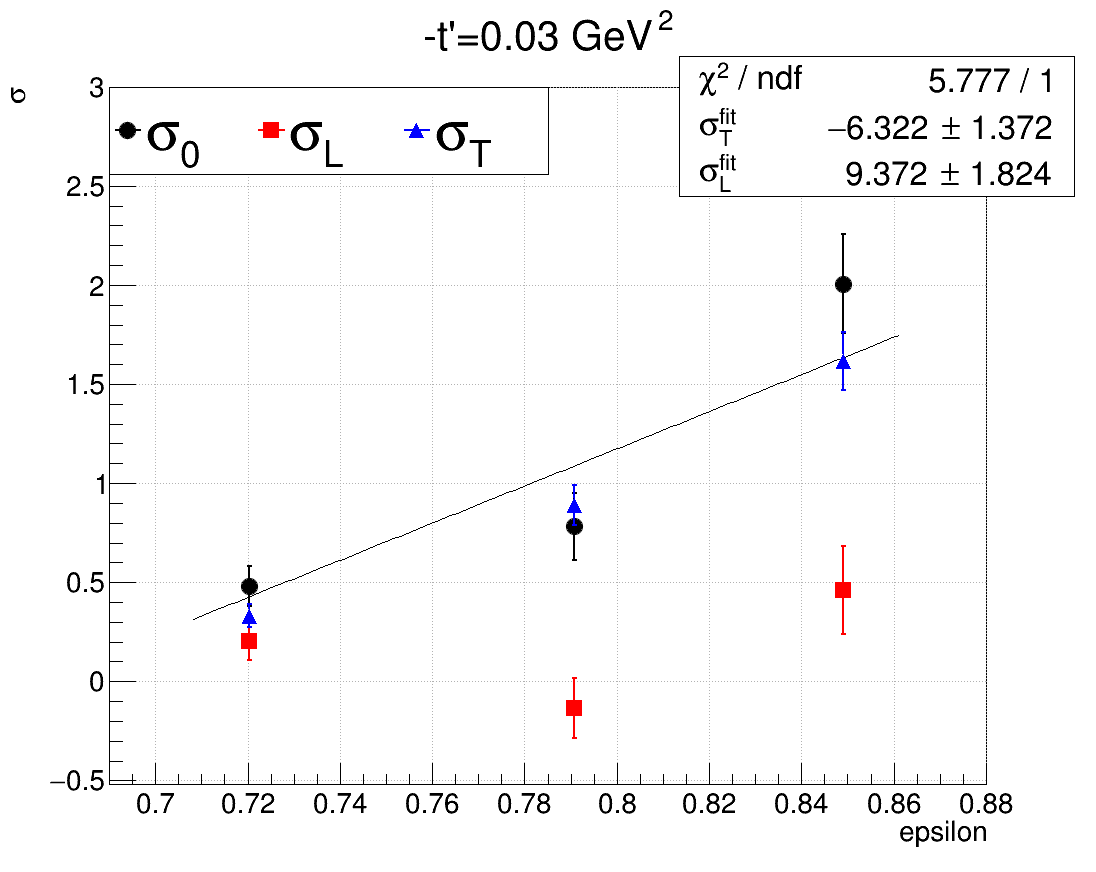

In [55]:
%reset -f
import ROOT, math

dataL = [
    (1.5, 0.0236977, 0.459892, 0.221428, 0.360343),
    (1.5, 0.0727075, 0.205479, 0.270141, 0.339126),
    (1.75, 0.0251812, -0.136373, 0.150687, 0.379239),
    (1.75, 0.0742083, -0.25926, 0.180713, 0.412568),
    (1.75, 0.123273, -0.409029, 0.209363, 0.4098),
    (2, 0.025556, 0.205509, 0.0979794, 0.152368),
    (2, 0.0750411, -0.180349, 0.130282, 0.190923),
]

dataT = [
    (1.5, 0.0236977, 1.61618, 0.144482, 0.235622),
    (1.5, 0.0727075, 1.61171, 0.179585, 0.226286),
    (1.75, 0.0251812, 0.889777, 0.101047, 0.250887),
    (1.75, 0.0742083, 1.03266, 0.123592, 0.278075),
    (1.75, 0.123273, 1.13603, 0.145748, 0.281456),
    (2, 0.025556, 0.331631, 0.0588313, 0.0900722),
    (2, 0.0750411, 0.652636, 0.0806495, 0.115192),
]


def epsilon(q2,xb,E):
    y = q2/2/0.938/xb/E
    g2 = (2*xb*0.938)**2/q2
    eps = (1-y-0.25*y*y*g2)/(1-y+0.5*y*y+0.25*y*y*g2)
    return eps


def getgrs(inds, dataL, dataT):
    xb = 0.36
    Eb = 5.55

    gr0,grT,grL = ROOT.TGraphErrors(),ROOT.TGraphErrors(),ROOT.TGraphErrors()
    for i in inds:
        q2=dataL[i][0]
        tp = dataL[i][1]

        sT=dataT[i][2]
        dsT=dataT[i][3]

        sL=dataL[i][2]
        dsL=dataL[i][3]

        eps = epsilon(q2,xb,Eb)
        print(q2,tp,eps,sT+eps*sL,math.sqrt(dsT*dsT+eps*dsL*dsL))
    
        gr0.SetPoint(gr0.GetN(), eps, sT+eps*sL)
        gr0.SetPointError(gr0.GetN()-1, 0, math.sqrt(dsT*dsT+eps*dsL*dsL))
        grL.SetPoint(grL.GetN(), eps, sL)
        grL.SetPointError(grL.GetN()-1, 0, dsL)
        grT.SetPoint(grT.GetN(), eps, sT)
        grT.SetPointError(grT.GetN()-1, 0, dsT)
    return tp,gr0,grT,grL

ibin = 1
if ibin==1:
    tp,gr0,grT,grL = getgrs([0,2,5], dataL, dataT)
else:
    tp,gr0,grT,grL = getgrs([1,3,6], dataL, dataT)

gr0.SetMarkerStyle(20)
grL.SetMarkerStyle(21)
grT.SetMarkerStyle(22)
gr0.SetMarkerSize(2)
grL.SetMarkerSize(2)
grT.SetMarkerSize(2)
gr0.SetLineWidth(2)
grL.SetLineWidth(2)
grT.SetLineWidth(2)
grL.SetMarkerColor(2)
grT.SetMarkerColor(4)
grL.SetLineColor(2)
grT.SetLineColor(4)

ROOT.gStyle.SetOptFit(1)
f1 = ROOT.TF1("f1","pol1",0,1)
f1.SetParNames("#sigma^{fit}_{T}", "#sigma^{fit}_{L}")
f1.SetLineColor(1)
f1.SetLineWidth(1)
gr0.Fit(f1)

c1 = ROOT.TCanvas("c1","c1",1100,900)
c1.SetGrid(1)
c1.Draw()
fr=c1.DrawFrame(0.69,-0.52,0.88,3)
fr1 = fr.Clone("fraxis")
fr.SetAxisColor(16,'xy')
fr1.Draw("sameaxis")
fr.SetTitle("-t'={:.2f} GeV^{{2}};epsilon;#sigma".format(tp))
leg = ROOT.TLegend(0.1,0.8,0.5,0.9)
leg.AddEntry(gr0,"#sigma_{0}","PL")
leg.AddEntry(grL,"#sigma_{L}","PL")
leg.AddEntry(grT,"#sigma_{T}","PL")
leg.SetNColumns(3)
gr0.Draw("P")
grL.Draw("P")
grT.Draw("P")
leg.Draw()
c1.Print("Rosenbluth_test.HallA.data.tpbin"+str(ibin)+".pdf")

